#Cyclist Bikeshare Data Analysis Capstone Project

###Introduction
BikeShare Cyclist a bike transportation company based in Chicago, Illinois is faced with the issue of converting customer (casual) bike riders into members. I received a data set which includes subscriber and customer (casual) riders transport details for four quarters in the year 2019, the stakeholders at Cyclist Bikeshare have asked me to use data to inform decisions on turning customer riders into subscribers.
For this project I will be using the six phases of data analysis according to Google, which are;
1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act


####Ask
There are 3 main questions which my immediate stakeholder wants me to answer using this data
1. How do customer and subscriber riders differ in bike usage?
2. Why would customer riders buy a subscription?
3. How can the company use digital media to influence customer riders to become subscribers?

To find answers to the questions, I would first have to come up with a statement of the business task.

##### Business Task
The main objective of this project is to examine behaviors of customer riders and provide data informed suggestions that can turn them into subscriber riders.

####Prepare
For the prepare phase, a data set has been provided by the company's data team, this clears up the question of the data sets integrity. I can examine the data and perform cleaning before I start my analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set>

In [2]:
df = pd.read_csv('/content/Divvy_Trips_2013.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday
0,4118,2013-06-27 12:11,2013-06-27 12:16,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,NaN,NaN
1,4275,2013-06-27 14:44,2013-06-27 14:45,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer,NaN,NaN
2,4291,2013-06-27 14:58,2013-06-27 15:05,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer,NaN,NaN
3,4316,2013-06-27 15:06,2013-06-27 15:09,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer,NaN,NaN
4,4342,2013-06-27 15:13,2013-06-27 15:27,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer,NaN,NaN


In [4]:
df.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthday             float64
dtype: object

The `starttime` and `stoptime` columns are in string format. This has to be changed to datetime in the Process phase.

In [5]:
for i, column in enumerate(['usertype', 'gender']):
  i = i+1
  print('unique values for ', column,df[column].unique())

unique values for  usertype ['Customer' 'Subscriber']
unique values for  gender [nan 'Male' 'Female']


According to my immediate stakeholder, the `gender` and `birthday` contain null values, because those columns don't contain data from customer (casual) riders.

####Process
The Process phase deals with data cleaning, which is basically making the data more useful for analyses.

In [6]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [7]:
df['month'] = df['starttime'].dt.month_name()
df['day_of_week'] = df['starttime'].dt.day_name()
df['time_of_day'] = df['starttime'].dt.time
df['hour'] = df['starttime'].dt.hour

In [8]:
df.dtypes

trip_id                       int64
starttime            datetime64[ns]
stoptime             datetime64[ns]
bikeid                        int64
tripduration                  int64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthday                    float64
month                        object
day_of_week                  object
time_of_day                  object
hour                          int64
dtype: object

I set an order for months and day of week to follow, if this is not done Python would arrange any aggregations done in alphabetic order, which will lead to confusing visuals.

In [9]:
from pandas.api.types import CategoricalDtype
cats_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats_day, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)

In [10]:
cats_month = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type2 = CategoricalDtype(categories=cats_month, ordered=True)
df['month'] = df['month'].astype(cat_type2)

In [11]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday,month,day_of_week,time_of_day,hour
0,4118,2013-06-27 12:11:00,2013-06-27 12:16:00,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,NaN,NaN,June,Thursday,12:11:00,12
1,4275,2013-06-27 14:44:00,2013-06-27 14:45:00,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer,NaN,NaN,June,Thursday,14:44:00,14
2,4291,2013-06-27 14:58:00,2013-06-27 15:05:00,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer,NaN,NaN,June,Thursday,14:58:00,14
3,4316,2013-06-27 15:06:00,2013-06-27 15:09:00,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer,NaN,NaN,June,Thursday,15:06:00,15
4,4342,2013-06-27 15:13:00,2013-06-27 15:27:00,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer,NaN,NaN,June,Thursday,15:13:00,15


The data set was relatively clean, after changing some columns to datetime format and setting standards for our month and day of week columns, it is time to go into the Analysis phase of the project. 

####Analysis
For this phase of the project, I tried to find relationships by aggregating columns in the data set, which I will visualize in the Share phase of this project.

In [12]:
df_1 = df.groupby(['usertype'])['trip_id'].count().to_frame()
df_1

,trip_id
usertype,
Customer,356752
Subscriber,403036


In [13]:
df_2 = df.groupby(['usertype'])['tripduration'].mean().to_frame()
df_2

,tripduration
usertype,
Customer,1824.054727
Subscriber,722.018892


In [14]:
df_3 = df.groupby(['month', 'usertype'])['trip_id'].count().to_frame()
df_3.reset_index(inplace=True)
df_3

,month,usertype,trip_id
0,June,Customer,3120
1,June,Subscriber,885
2,July,Customer,51548
3,July,Subscriber,23319
4,August,Customer,110101
5,August,Subscriber,60407
6,September,Customer,105335
7,September,Subscriber,95695
8,October,Customer,64201
9,October,Subscriber,110494


In [15]:
df_4 = df.groupby(['day_of_week', 'usertype'])['trip_id'].count().to_frame()
df_4.reset_index(inplace=True)
df_4

,day_of_week,usertype,trip_id
0,Monday,Customer,41866
1,Monday,Subscriber,64042
2,Tuesday,Customer,32807
3,Tuesday,Subscriber,69896
4,Wednesday,Customer,30221
5,Wednesday,Subscriber,66828
6,Thursday,Customer,33599
7,Thursday,Subscriber,63272
8,Friday,Customer,47721
9,Friday,Subscriber,67643


In [16]:
df_5 = df.groupby(['day_of_week', 'usertype'])['tripduration'].mean().to_frame()
df_5.reset_index(inplace=True)
df_5

,day_of_week,usertype,tripduration
0,Monday,Customer,1765.949123
1,Monday,Subscriber,708.334952
2,Tuesday,Customer,1656.959399
3,Tuesday,Subscriber,702.288128
4,Wednesday,Customer,1671.559942
5,Wednesday,Subscriber,698.994823
6,Thursday,Customer,1780.871484
7,Thursday,Subscriber,711.272111
8,Friday,Customer,1796.688502
9,Friday,Subscriber,713.068906


In [17]:
df_6 = df.groupby(['month', 'usertype'])['tripduration'].mean().to_frame()
df_6.reset_index(inplace=True)
df_6

,month,usertype,tripduration
0,June,Customer,2284.595192
1,June,Subscriber,1465.116384
2,July,Customer,2198.832855
3,July,Subscriber,851.450748
4,August,Customer,1886.985613
5,August,Subscriber,786.317463
6,September,Customer,1742.548061
7,September,Subscriber,756.803417
8,October,Customer,1628.405663
9,October,Subscriber,698.240438


In [18]:
df_7 = df.groupby(['hour', 'usertype'])['trip_id'].count().to_frame()
df_7.reset_index(inplace=True)
df_7.head()

,hour,usertype,trip_id
0,0,Customer,4591
1,0,Subscriber,2714
2,1,Customer,2903
3,1,Subscriber,1582
4,2,Customer,1954


In [19]:
df_8 = df.groupby(['hour', 'usertype'])['tripduration'].mean().to_frame()
df_8.reset_index(inplace=True)
df_8.head()

,hour,usertype,tripduration
0,0,Customer,1926.543455
1,0,Subscriber,772.408622
2,1,Customer,2013.688254
3,1,Subscriber,696.296460
4,2,Customer,2198.434493


####Share
The Share phase of this project includes making visuals from my analysis that help stakeholders understand my findings

Text(0.5, 0, 'User-Type')

<Figure size 720x360 with 0 Axes>

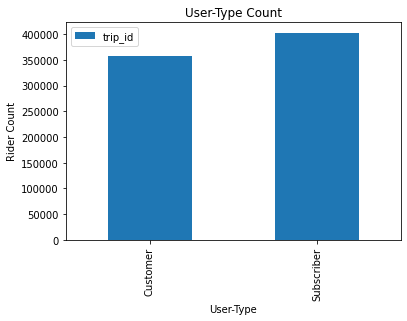

In [20]:
plt.figure(figsize=(10,5))
df_1.plot.bar()
plt.title('User-Type Count')
plt.ylabel('Rider Count')
plt.xlabel('User-Type')

As expected the number of subscriber riders exceed that of the casual riders, I did some aggregation to discover behaviors between the two categories.

Text(0.5, 0, 'User-Type')

<Figure size 720x360 with 0 Axes>

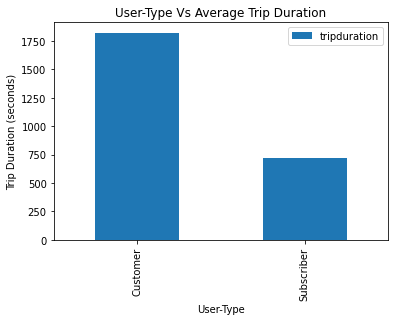

In [21]:
plt.figure(figsize=(10,5))
df_2.plot.bar()
plt.title('User-Type Vs Average Trip Duration')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('User-Type')

Suprising to see that customer(casual) riders spend more time on average riding bikes than subscriber riders.

Text(0.5, 0, 'Month')

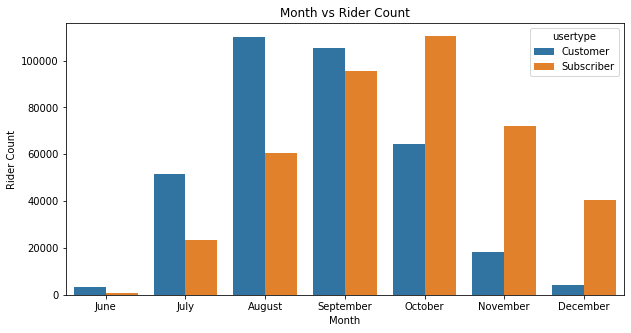

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='trip_id', data=df_3, hue='usertype')
plt.title('Month vs Rider Count')
plt.ylabel('Rider Count')
plt.xlabel('Month')

In the months of June, July, August and September Casual riders were more than Subscribers, but from October to December the Subsctibers were almost double the amount of Casual in every month.

Text(0.5, 0, 'Day of Week')

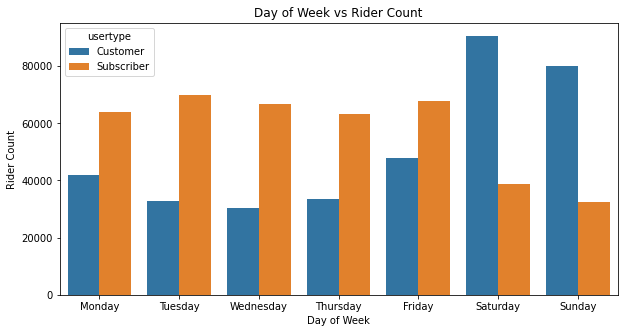

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week', y='trip_id', data=df_4, hue='usertype')
plt.title('Day of Week vs Rider Count')
plt.ylabel('Rider Count')
plt.xlabel('Day of Week')

On the week days Subscriber riders spend more time on bikes than Casual riders, while in the weekend Casual riders double Subscribers numbers.

Text(0.5, 0, 'Day of Week')

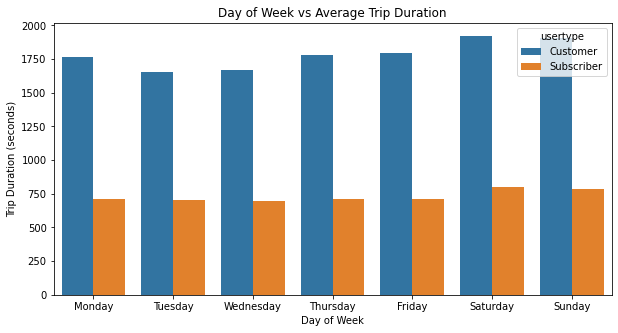

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='day_of_week', y='tripduration', data=df_5, hue='usertype')
plt.title('Day of Week vs Average Trip Duration')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Day of Week')

Text(0.5, 0, 'Month')

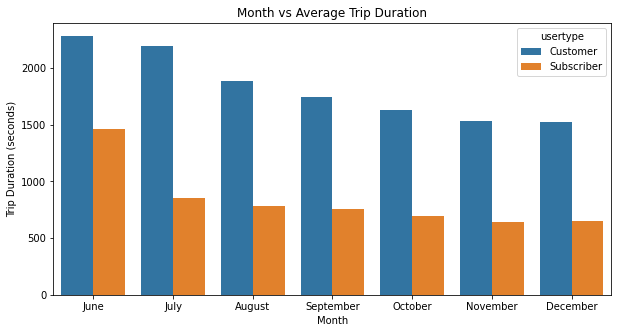

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='tripduration', data=df_6, hue='usertype')
plt.title('Month vs Average Trip Duration')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')

On average Casual riders spend more time on bikes than Subscriber riders in every month, in many instances they even spend double the times of Subscribers.

Text(0.5, 0, 'Hour of Day')

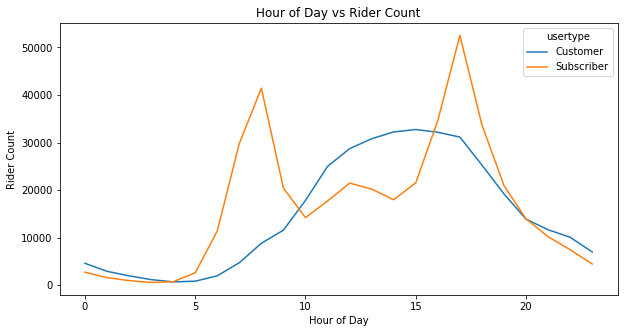

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x='hour', y='trip_id', data=df_7, hue='usertype')
plt.title('Hour of Day vs Rider Count')
plt.ylabel('Rider Count')
plt.xlabel('Hour of Day')

From the hours between 08:00 - 20:00 there's a rise in the number of Casual riders, while for the Subscribers most use comes between 06:00 - 09:00, 11:00 - 14:00 and then again between 16:00 - 19:00.

Text(0.5, 0, 'Hour of Day')

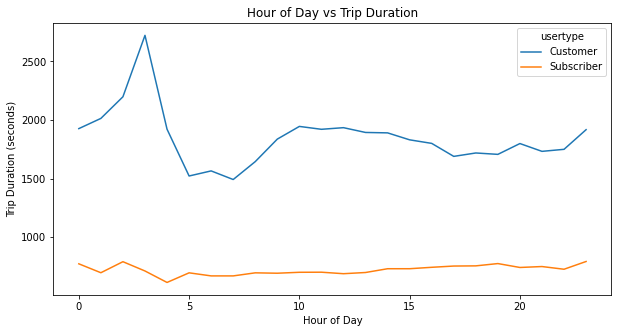

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x='hour', y='tripduration', data=df_8, hue='usertype')
plt.title('Hour of Day vs Trip Duration')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Hour of Day')

There is a clear difference between the ride duration of Casual and Subscriber riders, Subscriber riders spend around 700 seconds on average during trips, while Casual riders spend 2,000 seconds on average during trips.

####Act
This objective of this portion of the project is to make decisions based on the findings from our analysis. My stakeholder has asked for 3 data driven suggestions that can see Customer riders become subscribers.

1. The marketing team can aid in developing advertisements meant to captivate Casual riders to obtain subscriptions. From the data I would think a summer and weekend themed advert would be the best angle to explore.
2. Discounts and Free trials should be explored as an option to reduce the number of Casual riders.
3. Create competitions using social media as a means which will create awareness to potential subscribers.
